In [1]:
import pandas as pd
import glob
import os
import numpy as np
from datetime import datetime
import warnings
import altair as alt

/Users/richardabbey/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import time

The National Health Institute publishes data on grants awarded by institutes under it or affiliated to it [here](https://reporter.nih.gov/exporter/projects). The [data dictionary](https://grants.nih.gov/grants/acronym_list.htm) also provides a list of the institutes that awarded these grants. The acronym list is useful to helping narrow the data to the [National Mental Health Institute](https://www.nimh.nih.gov/)

In [3]:
# # path = r'/Users/richardabbey/Desktop/nimh' # paths where files are located
# all_files = glob.glob(os.path.join(path , "*.csv")) 
# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0, usecols=['ORG_NAME', 'ORG_STATE', 'PROJECT_START', 'PROJECT_END', 'TOTAL_COST','ADMINISTERING_IC'], encoding='utf-8', encoding_errors='ignore', low_memory=False)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
cleanGrants = pd.read_csv("national-health-grants-csv.csv")

In [5]:
#Filtering for only grants awarded by National Mental Health Institute
mentalHealthGrants = cleanGrants[cleanGrants.ADMINISTERING_IC == 'MH']

Importing a csv to copy the list of Historically Black Universities

In [6]:
df = pd.read_csv("hbcus-csv.csv")

In [7]:
df.Institution = df.Institution.str.upper()

In [8]:
mentalHealthGrants.ADMINISTERING_IC.value_counts()

MH    127113
Name: ADMINISTERING_IC, dtype: int64

In [9]:
# Getting Unique names of HBCUs
df.Institution.unique()

array(['ALABAMA A&M UNIVERSITY', 'ALABAMA STATE UNIVERSITY',
       'ALBANY STATE UNIVERSITY', 'ALCORN STATE UNIVERSITY',
       'ALLEN UNIVERSITY', 'AMERICAN BAPTIST COLLEGE',
       'UNIVERSITY OF ARKANSAS AT PINE BLUFF', 'ARKANSAS BAPTIST COLLEGE',
       'BARBER–SCOTIA COLLEGE', 'BENEDICT COLLEGE', 'BENNETT COLLEGE',
       'BETHUNE–COOKMAN UNIVERSITY', 'BISHOP STATE COMMUNITY COLLEGE',
       'BLUEFIELD STATE COLLEGE', 'BOWIE STATE UNIVERSITY',
       'CENTRAL STATE UNIVERSITY', 'CHEYNEY UNIVERSITY OF PENNSYLVANIA',
       'CLAFLIN UNIVERSITY', 'CLARK ATLANTA UNIVERSITY',
       'CLINTON COLLEGE', 'COAHOMA COMMUNITY COLLEGE',
       'COPPIN STATE UNIVERSITY', 'DELAWARE STATE UNIVERSITY',
       'DENMARK TECHNICAL COLLEGE', 'DILLARD UNIVERSITY',
       'UNIVERSITY OF THE DISTRICT OF COLUMBIA',
       'EDWARD WATERS UNIVERSITY', 'ELIZABETH CITY STATE UNIVERSITY',
       'FAYETTEVILLE STATE UNIVERSITY', 'FISK UNIVERSITY',
       'FLORIDA A&M UNIVERSITY', 'FLORIDA MEMORIAL UNIVERSITY'

In [10]:
blackUniversities = ['ALABAMA A&M UNIVERSITY', 'ALABAMA STATE UNIVERSITY',
       'ALBANY STATE UNIVERSITY', 'ALCORN STATE UNIVERSITY',
       'ALLEN UNIVERSITY', 'AMERICAN BAPTIST COLLEGE',
       'UNIVERSITY OF ARKANSAS AT PINE BLUFF', 'ARKANSAS BAPTIST COLLEGE',
       'BARBER–SCOTIA COLLEGE', 'BENEDICT COLLEGE', 'BENNETT COLLEGE',
       'BETHUNE–COOKMAN UNIVERSITY', 'BISHOP STATE COMMUNITY COLLEGE',
       'BLUEFIELD STATE COLLEGE', 'BOWIE STATE UNIVERSITY',
       'CENTRAL STATE UNIVERSITY', 'CHEYNEY UNIVERSITY OF PENNSYLVANIA',
       'CLAFLIN UNIVERSITY', 'CLARK ATLANTA UNIVERSITY',
       'CLINTON COLLEGE', 'COAHOMA COMMUNITY COLLEGE',
       'COPPIN STATE UNIVERSITY', 'DELAWARE STATE UNIVERSITY',
       'DENMARK TECHNICAL COLLEGE', 'DILLARD UNIVERSITY',
       'UNIVERSITY OF THE DISTRICT OF COLUMBIA',
       'EDWARD WATERS UNIVERSITY', 'ELIZABETH CITY STATE UNIVERSITY',
       'FAYETTEVILLE STATE UNIVERSITY', 'FISK UNIVERSITY',
       'FLORIDA A&M UNIVERSITY', 'FLORIDA MEMORIAL UNIVERSITY',
       'FORT VALLEY STATE UNIVERSITY', 'GADSDEN STATE COMMUNITY COLLEGE',
       'GRAMBLING STATE UNIVERSITY', 'HAMPTON UNIVERSITY',
       'HARRIS–STOWE STATE UNIVERSITY',
       'HINDS COMMUNITY COLLEGE AT UTICA', 'HOWARD UNIVERSITY',
       'HUSTON–TILLOTSON UNIVERSITY',
       'INTERDENOMINATIONAL THEOLOGICAL CENTER',
       'J. F. DRAKE STATE TECHNICAL COLLEGE', 'JACKSON STATE UNIVERSITY',
       'JARVIS CHRISTIAN COLLEGE', 'JOHNSON C. SMITH UNIVERSITY',
       'KENTUCKY STATE UNIVERSITY', 'KNOXVILLE COLLEGE', 'LANE COLLEGE',
       'LANGSTON UNIVERSITY', 'LAWSON STATE COMMUNITY COLLEGE',
       'LEMOYNE-OWEN COLLEGE', 'LINCOLN UNIVERSITY',
       'LIVINGSTONE COLLEGE', 'UNIVERSITY OF MARYLAND EASTERN SHORE',
       'MEHARRY MEDICAL COLLEGE', 'MILES COLLEGE',
       'MISSISSIPPI VALLEY STATE UNIVERSITY', 'MOREHOUSE COLLEGE',
       'MOREHOUSE SCHOOL OF MEDICINE', 'MORGAN STATE UNIVERSITY',
       'MORRIS BROWN COLLEGE', 'MORRIS COLLEGE',
       'NORFOLK STATE UNIVERSITY',
       'NORTH CAROLINA AGRICULTURAL & TECHNICAL STATE UNIVERSITY',
       'NORTH CAROLINA CENTRAL UNIVERSITY', 'OAKWOOD UNIVERSITY',
       'PAINE COLLEGE', 'PAUL QUINN COLLEGE',
       'PAYNE THEOLOGICAL SEMINARY', 'PHILANDER SMITH COLLEGE',
       'PRAIRIE VIEW A&M UNIVERSITY', 'RUST COLLEGE',
       'SAVANNAH STATE UNIVERSITY', 'SELMA UNIVERSITY', 'SHAW UNIVERSITY',
       'SHORTER COLLEGE', 'SHELTON STATE COMMUNITY COLLEGE',
       'SIMMONS COLLEGE', 'SOUTH CAROLINA STATE UNIVERSITY',
       'SOUTHERN UNIVERSITY AT NEW ORLEANS',
       'SOUTHERN UNIVERSITY AT SHREVEPORT',
       'SOUTHERN UNIVERSITY AND A&M COLLEGE',
       'SOUTHWESTERN CHRISTIAN COLLEGE', 'SPELMAN COLLEGE',
       "ST. AUGUSTINE'S UNIVERSITY", "ST. PHILIP'S COLLEGE",
       'STILLMAN COLLEGE', 'TALLADEGA COLLEGE',
       'TENNESSEE STATE UNIVERSITY', 'TEXAS COLLEGE',
       'TEXAS SOUTHERN UNIVERSITY', 'TOUGALOO COLLEGE',
       'TRENHOLM STATE COMMUNITY COLLEGE', 'TUSKEGEE UNIVERSITY',
       'UNIVERSITY OF THE VIRGIN ISLANDS', 'VIRGINIA STATE UNIVERSITY',
       'VIRGINIA UNION UNIVERSITY', 'VIRGINIA UNIVERSITY OF LYNCHBURG',
       'VOORHEES COLLEGE', 'WEST VIRGINIA STATE UNIVERSITY',
       'WILBERFORCE UNIVERSITY', 'WILEY COLLEGE',
       'WINSTON-SALEM STATE UNIVERSITY', 'XAVIER UNIVERSITY OF LOUISIANA']

In [11]:
len(blackUniversities)

104

It is important to filter NA values from the list of organizations

In [12]:
cleanGrants ['facility_type'] = np.where(cleanGrants['ORG_NAME'].isin(blackUniversities), 'HBCU', 'Non-HBCU')

In [13]:
#Filtering for non-HBCUs institutions 
cleanGrants.facility_type.value_counts()


Non-HBCU    126669
HBCU           444
Name: facility_type, dtype: int64

In [14]:
# Converting the start and end columns into datetime to aid in visualization where necessary
cleanGrants['PROJECT_START'] = pd.to_datetime(cleanGrants.PROJECT_START, format="%m/%d/%Y")
cleanGrants['PROJECT_END'] = pd.to_datetime(cleanGrants.PROJECT_START, format="%m/%d/%Y")

In [15]:
HBCUOnly = cleanGrants[cleanGrants['facility_type'] == 'HBCU']

In [16]:
len(HBCUOnly.ORG_NAME.unique())

20

In [17]:
cleanGrants.dtypes

ADMINISTERING_IC            object
ORG_NAME                    object
ORG_STATE                   object
PROJECT_START       datetime64[ns]
PROJECT_END         datetime64[ns]
TOTAL_COST                 float64
facility_type               object
dtype: object

<AxesSubplot:title={'center':'Projects started peaked in the 2000s'}, xlabel='PROJECT_START'>

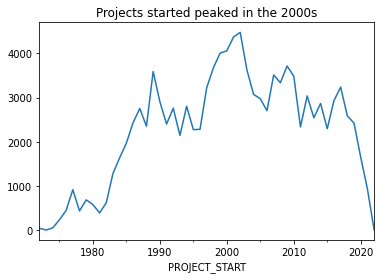

In [47]:
cleanGrants.resample('Y', on='PROJECT_START').size() \
    .plot(title="Projects started peaked in the 2000s")

In [48]:
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [49]:
cleanGrants.groupby(by='facility_type').TOTAL_COST.sum()

facility_type
HBCU          50186842.0
Non-HBCU   29813079827.0
Name: TOTAL_COST, dtype: float64

In [23]:
cleanGrants['Year'] = pd.to_datetime(cleanGrants.PROJECT_START, errors='coerce', format="%m/%d/%Y").dt.strftime('%Y')


In [51]:
cleanGrants.groupby(by='facility_type').TOTAL_COST.sum()

facility_type
HBCU          50186842.0
Non-HBCU   29813079827.0
Name: TOTAL_COST, dtype: float64

In [60]:
blackUniversitiesGrants

,TOTAL_COST
ORG_NAME,
BOWIE STATE UNIVERSITY,117243.0
DELAWARE STATE UNIVERSITY,134776.0
DILLARD UNIVERSITY,0.0
FISK UNIVERSITY,0.0
GRAMBLING STATE UNIVERSITY,1893783.0
HAMPTON UNIVERSITY,4757664.0
HOWARD UNIVERSITY,15971508.0
JACKSON STATE UNIVERSITY,1433273.0
MEHARRY MEDICAL COLLEGE,4864786.0


In [83]:
blackUniversitiesGrants = cleanGrants[cleanGrants.facility_type=='HBCU'].groupby(by='ORG_NAME').TOTAL_COST.sum().to_frame().reset_index()

In [84]:
blackUniversitiesGrants = blackUniversitiesGrants[blackUniversitiesGrants.TOTAL_COST > 0]

In [88]:
blackUniversitiesGrants.to_csv('blackgrants.csv', index=False)

In [86]:
alt.Chart(blackUniversitiesGrants).mark_bar().encode(
    alt.X('ORG_NAME:N'),
    alt.Y('TOTAL_COST:Q')
).properties(
    width=300
)

alt.Chart(...)

In [87]:
alt.Chart(blackUniversitiesGrants).mark_bar().encode(
    x='TOTAL_COST:Q',
    y="ORG_NAME:N"
).properties(height=700)

alt.Chart(...)

In [24]:
nimhFunding = cleanGrants.groupby(['Year', 'facility_type']).TOTAL_COST.sum().to_frame('funding_amount').reset_index()

In [25]:
nimhFunding = nimhFunding[nimhFunding['funding_amount'] > 0]

In [26]:
nimhFunding = nimhFunding[nimhFunding['Year'] >= '1990']

In [27]:
pd.set_option('display.float_format', str)

In [28]:
nimhFunding.groupby(by='facility_type').funding_amount.sum()

facility_type
HBCU          34902823.0
Non-HBCU   26142227409.0
Name: funding_amount, dtype: float64

In [62]:
alt.Chart(nimhFunding).mark_bar().encode(
    alt.X('facility_type:N'),
    alt.Y('funding_amount:Q')
).properties(
    width=300
)

alt.Chart(...)

In [30]:
alt.Chart(nimhFunding).mark_area().encode(
    x="Year:T",
    y=alt.Y("funding_amount:Q"),
    color="facility_type:N"
)

alt.Chart(...)

In [31]:
alt.Chart(nimhFunding).transform_fold(['Non-HBCU', 'HBCU']).mark_bar().encode(
  x='Year:N',
  y='funding_amount:Q',
  color='facility_type:N')

alt.Chart(...)

In [32]:
alt.Chart(nimhFunding).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('funding_amount:Q', stack='center'),
    alt.Color('facility_type:N')
)

alt.Chart(...)

In [45]:
alt.Chart(nimhFunding[nimhFunding.facility_type=='HBCU']).mark_bar().encode(
  x='Year:N',
  y='funding_amount:Q',
  color='facility_type:N')

alt.Chart(...)

In [46]:
alt.Chart(nimhFunding[nimhFunding.facility_type=='Non-HBCU']).mark_bar().encode(
  x='Year:N',
  y='funding_amount:Q',
  color='facility_type:N')

alt.Chart(...)